In [2]:
!pip install jedi

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: tmp, Length: 150, dtype: int64
DecisionTreeClassifier()
[[0.1  0.12 0.14 ... 7.84 7.86 7.88]
 [0.1  0.12 0.14 ... 7

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


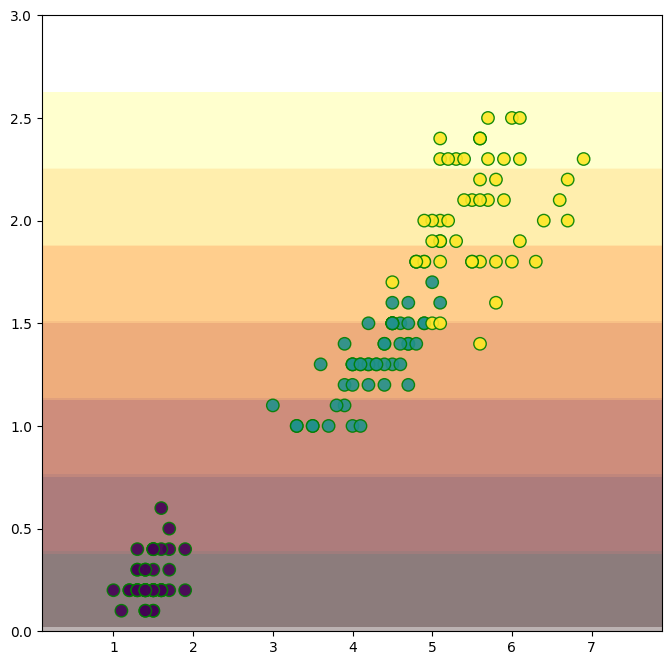

In [3]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from sklearn import svm
from jedi.api.refactoring import inline

#from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.base import clone
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz


df = sns.load_dataset('iris')
print(df.head())

col = ['petal_length', 'petal_width']
X = df.loc[:, col]                      #Obtiene todos las filas o registros de los campos petal_length y petal_width

print(X)

species_to_num = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

df['tmp'] = df['species'].map(species_to_num)   # Agrega columna nueva del data frame llamada tmp con info de species_to_num

y = df['tmp']
print(y)

# Predicción
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf)

Xv = X.values.reshape(-1, 1)
#print(Xv)

h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), (y_min, y_max, h))

print(xx)
print(yy)

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8, 8))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)

plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

plt.show()
